In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [43]:
df.shape

(907, 27)

Here we have 27 columns and 907 records

In [44]:
df.isnull().sum()   # to find the sum of nul values in each columns

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [45]:
df.duplicated().sum()

0

In this daatset there is no duplicate value is present

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Here we have 27 columns and 907 records

12 columns having object datatype

15 columns having float datatype

And is some columns whole the values is null so we have to drop that columns

Here we have to predict on 2 columns and one column is with continous data and other is with discrete data hence we have to build model on classification as well as on regression 

In [51]:
cols_drop=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','country','country_long']

for col in cols_drop:
    del df[col]

In [52]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we have deleted all the columns with all null values and we also dropped the country and country_long columns as it is not contributing anything towards the tartget variables

In [54]:
df['owner'].fillna(value='Unknown', inplace=True)

In [56]:
df['geolocation_source'].fillna(value='Unknown', inplace=True)

In [58]:
df['generation_data_source'].fillna(value='Unknown', inplace=True)

In [62]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['longitude'].mean(),inplace=True)
df['commissioning_year'].ffill(inplace=True)
df['year_of_capacity_data'].ffill(inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(),inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   gppd_idnr               907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                907 non-null    float64
 4   longitude               907 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   other_fuel1             198 non-null    object 
 7   commissioning_year      907 non-null    float64
 8   owner                   907 non-null    object 
 9   source                  907 non-null    object 
 10  url                     907 non-null    object 
 11  geolocation_source      907 non-null    object 
 12  year_of_capacity_data   907 non-null    float64
 13  generation_gwh_2014     907 non-null    float64
 14  generation_gwh_2015     907 non-null    fl

We have treated all the null values and we are dropping other_fuel1 as it has very less data and most of the rows with null values

In [64]:
df.drop('other_fuel1',axis=1,inplace=True)
df.shape

(907, 18)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   gppd_idnr               907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                907 non-null    float64
 4   longitude               907 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   commissioning_year      907 non-null    float64
 7   owner                   907 non-null    object 
 8   source                  907 non-null    object 
 9   url                     907 non-null    object 
 10  geolocation_source      907 non-null    object 
 11  year_of_capacity_data   907 non-null    float64
 12  generation_gwh_2014     907 non-null    float64
 13  generation_gwh_2015     907 non-null    float64
 14  generation_gwh_2016     907 non-null    fl

Now we have 0 null values and the data is clean

In [66]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: latitude, Length: 837, dtype: int64


77.464907 

Here we are dropping url as we dont have work with the url

In [67]:
df.drop('url',axis=1,inplace=True)
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2011.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2011.0,AES,CDM,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Unknown,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Unknown,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Unknown,Central Electricity Authority,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,2016.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,2016.0,Unknown,CDM,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,2016.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown


In [68]:
#dropping generation_data_source because only one unoque value is there which is Central Electricity Authority

df.drop('generation_data_source',axis=1,inplace=True)
df.shape

(907, 16)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    object 
 1   gppd_idnr              907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   latitude               907 non-null    float64
 4   longitude              907 non-null    float64
 5   primary_fuel           907 non-null    object 
 6   commissioning_year     907 non-null    float64
 7   owner                  907 non-null    object 
 8   source                 907 non-null    object 
 9   geolocation_source     907 non-null    object 
 10  year_of_capacity_data  907 non-null    float64
 11  generation_gwh_2014    907 non-null    float64
 12  generation_gwh_2015    907 non-null    float64
 13  generation_gwh_2016    907 non-null    float64
 14  generation_gwh_2017    907 non-null    float64
 15  genera

In [70]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Now we dont have any null values

In [71]:
df.isnull().sum().sum()

0

<AxesSubplot:>

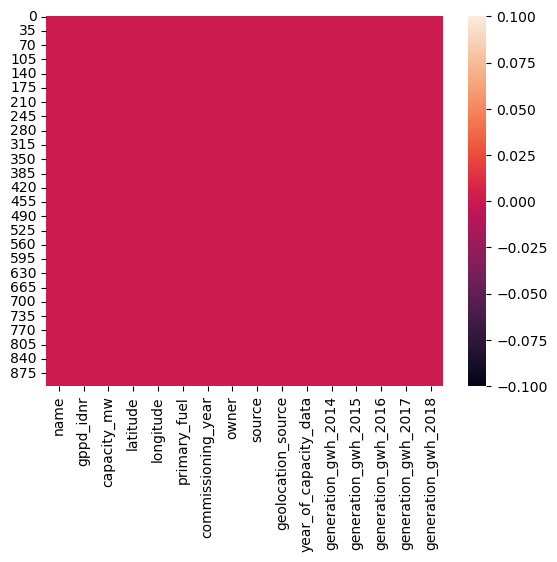

In [72]:
sns.heatmap(df.isnull())

By observing heatmap we observed no null values

In [73]:
# separating Numerical and categorical columns

#checking for categorical columns

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('Categorical columns    :',categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('Numerical columns    :',numerical_col)        


Categorical columns    : ['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'geolocation_source']


Numerical columns    : ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [74]:
df.describe()  #for mumerical columns

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1999.165380,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,16.742868,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1990.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2013.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


By observing the describe method below is the observation

the county of all columns is same means there is no null vaues into the dataset

between 75% percentile and max there is huge gap in columns capacity_mwgeneration_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 means outliers is present



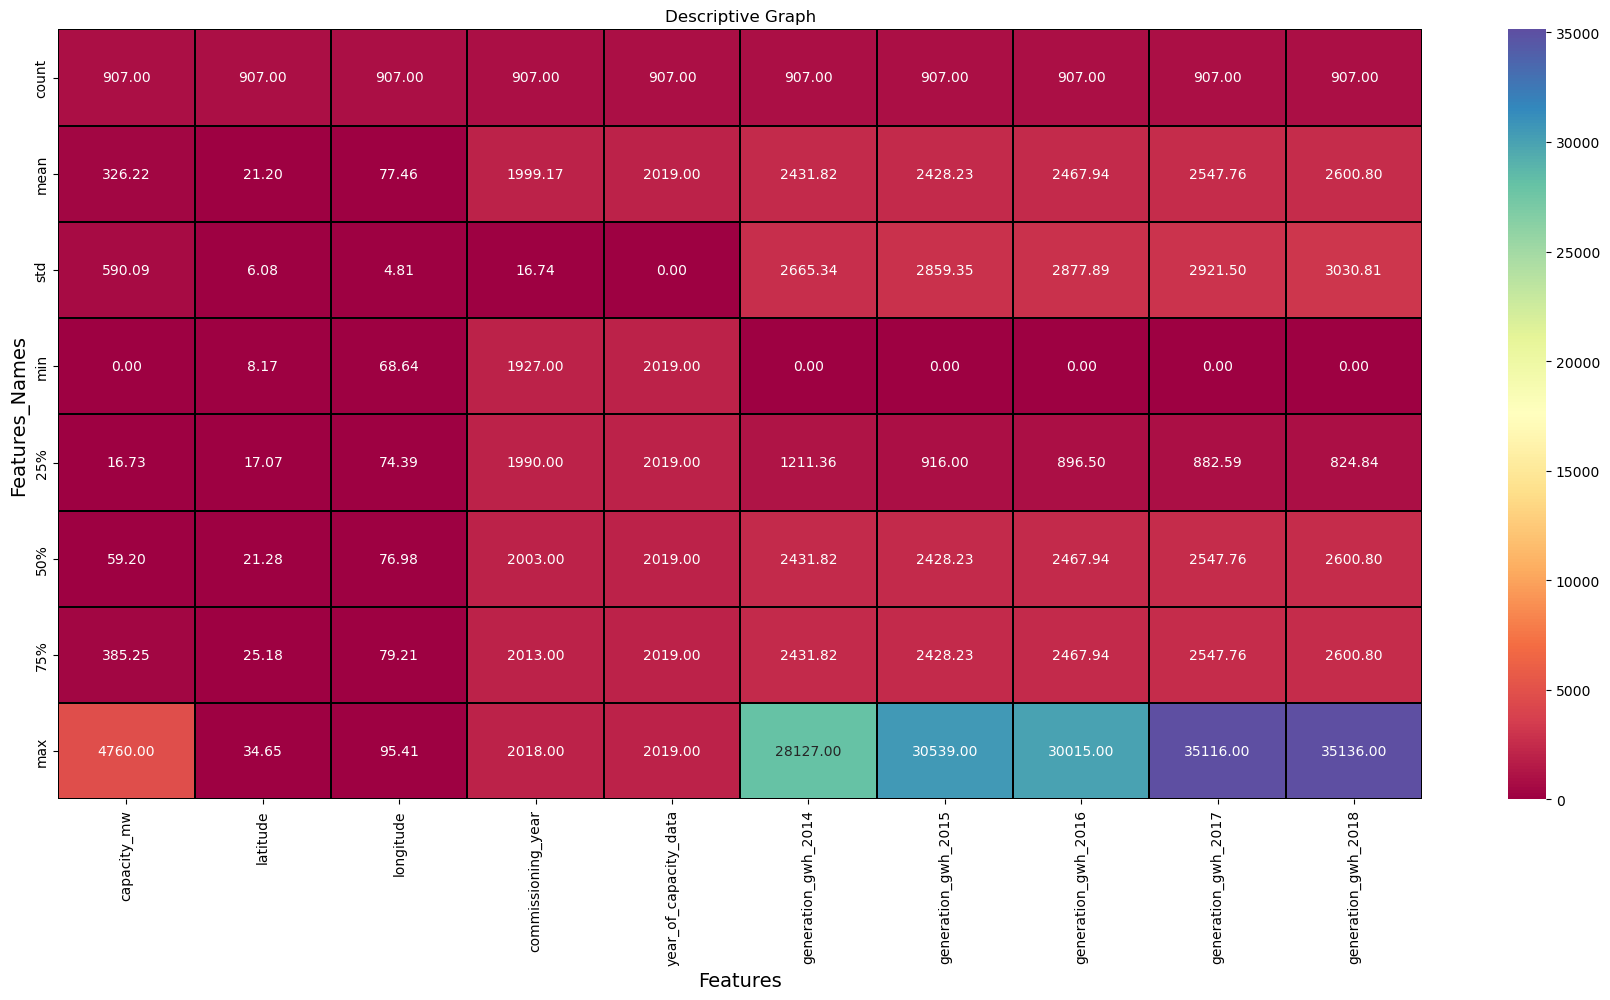

In [75]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, cmap='Spectral', linecolor='black',linewidth=0.2, fmt='0.2f')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features_Names', fontsize=14)
plt.title('Descriptive Graph')
plt.show()

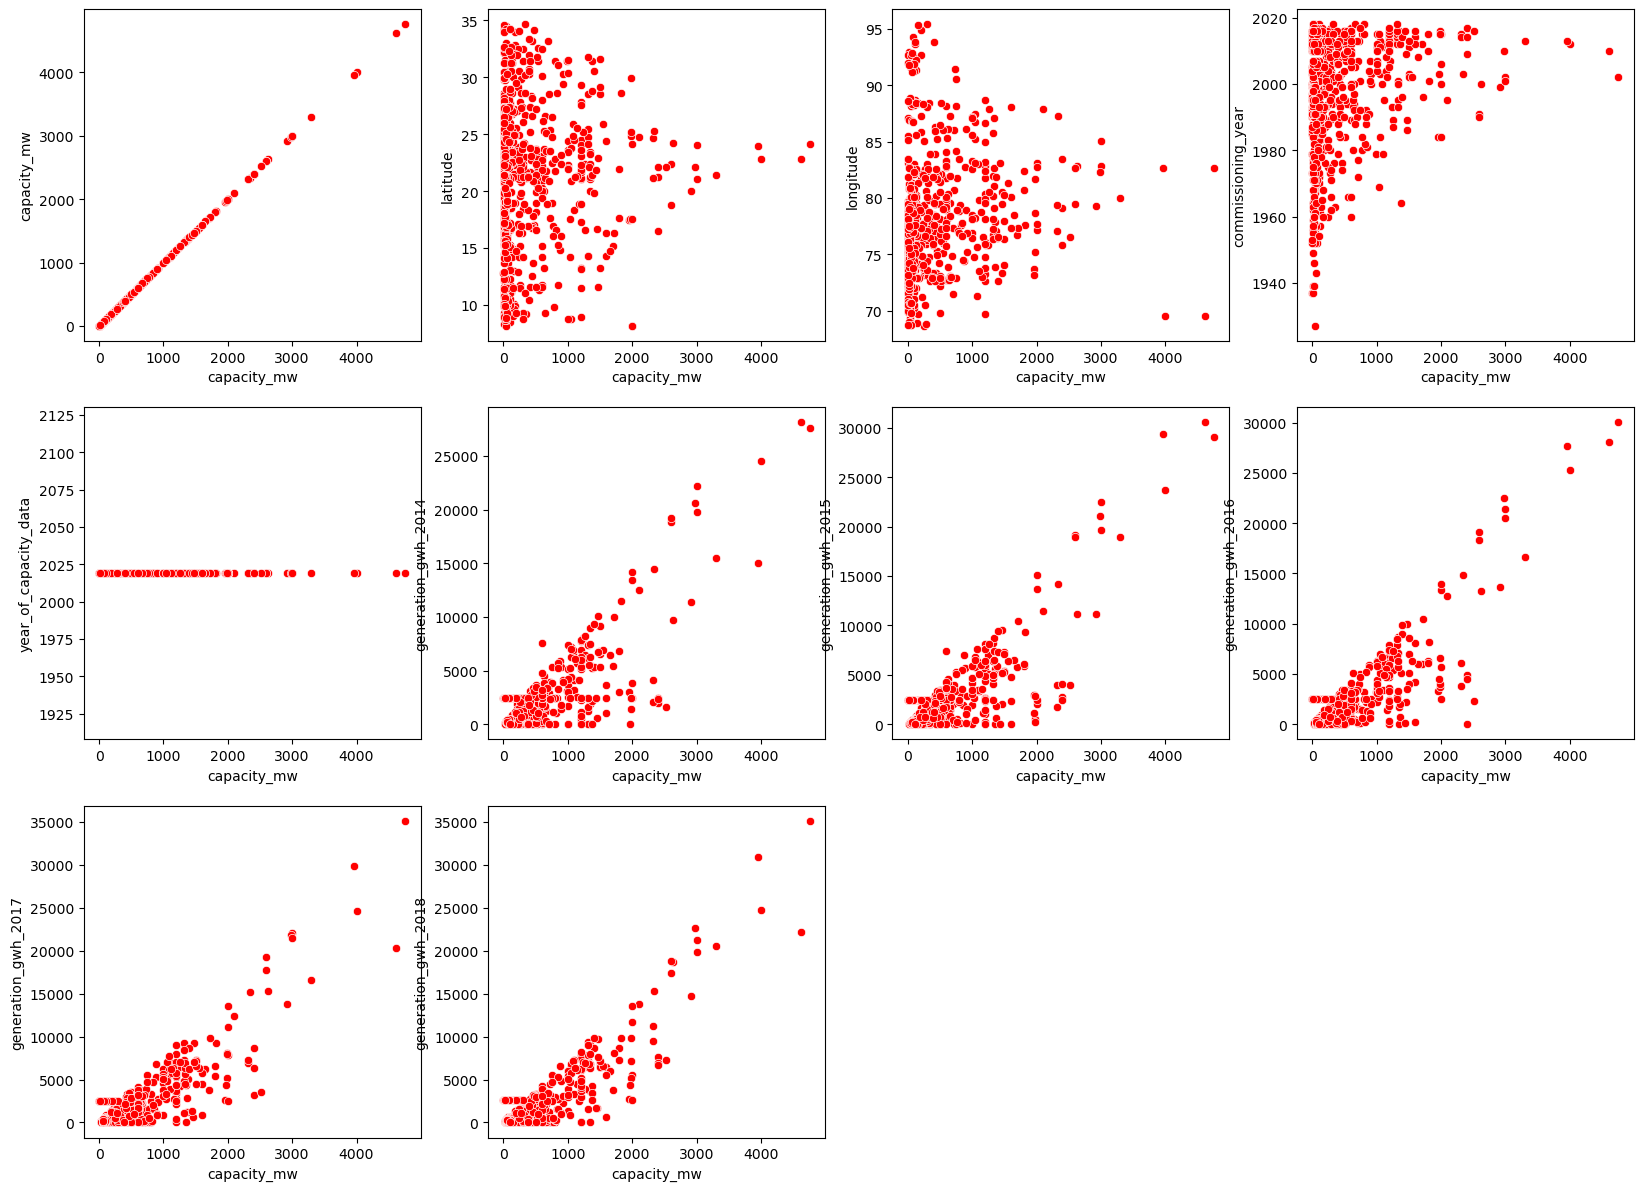

In [84]:
plt.figure(figsize=(20,25))
p=1
for col in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='capacity_mw',y=col,data=df,color='r')
        plt.xlabel('capacity_mw')
        plt.ylabel(col)
        p+=1
plt.show() 

Here we can observe that capacity_mw has an positive relation with the target variable for all the generation_gwh columns

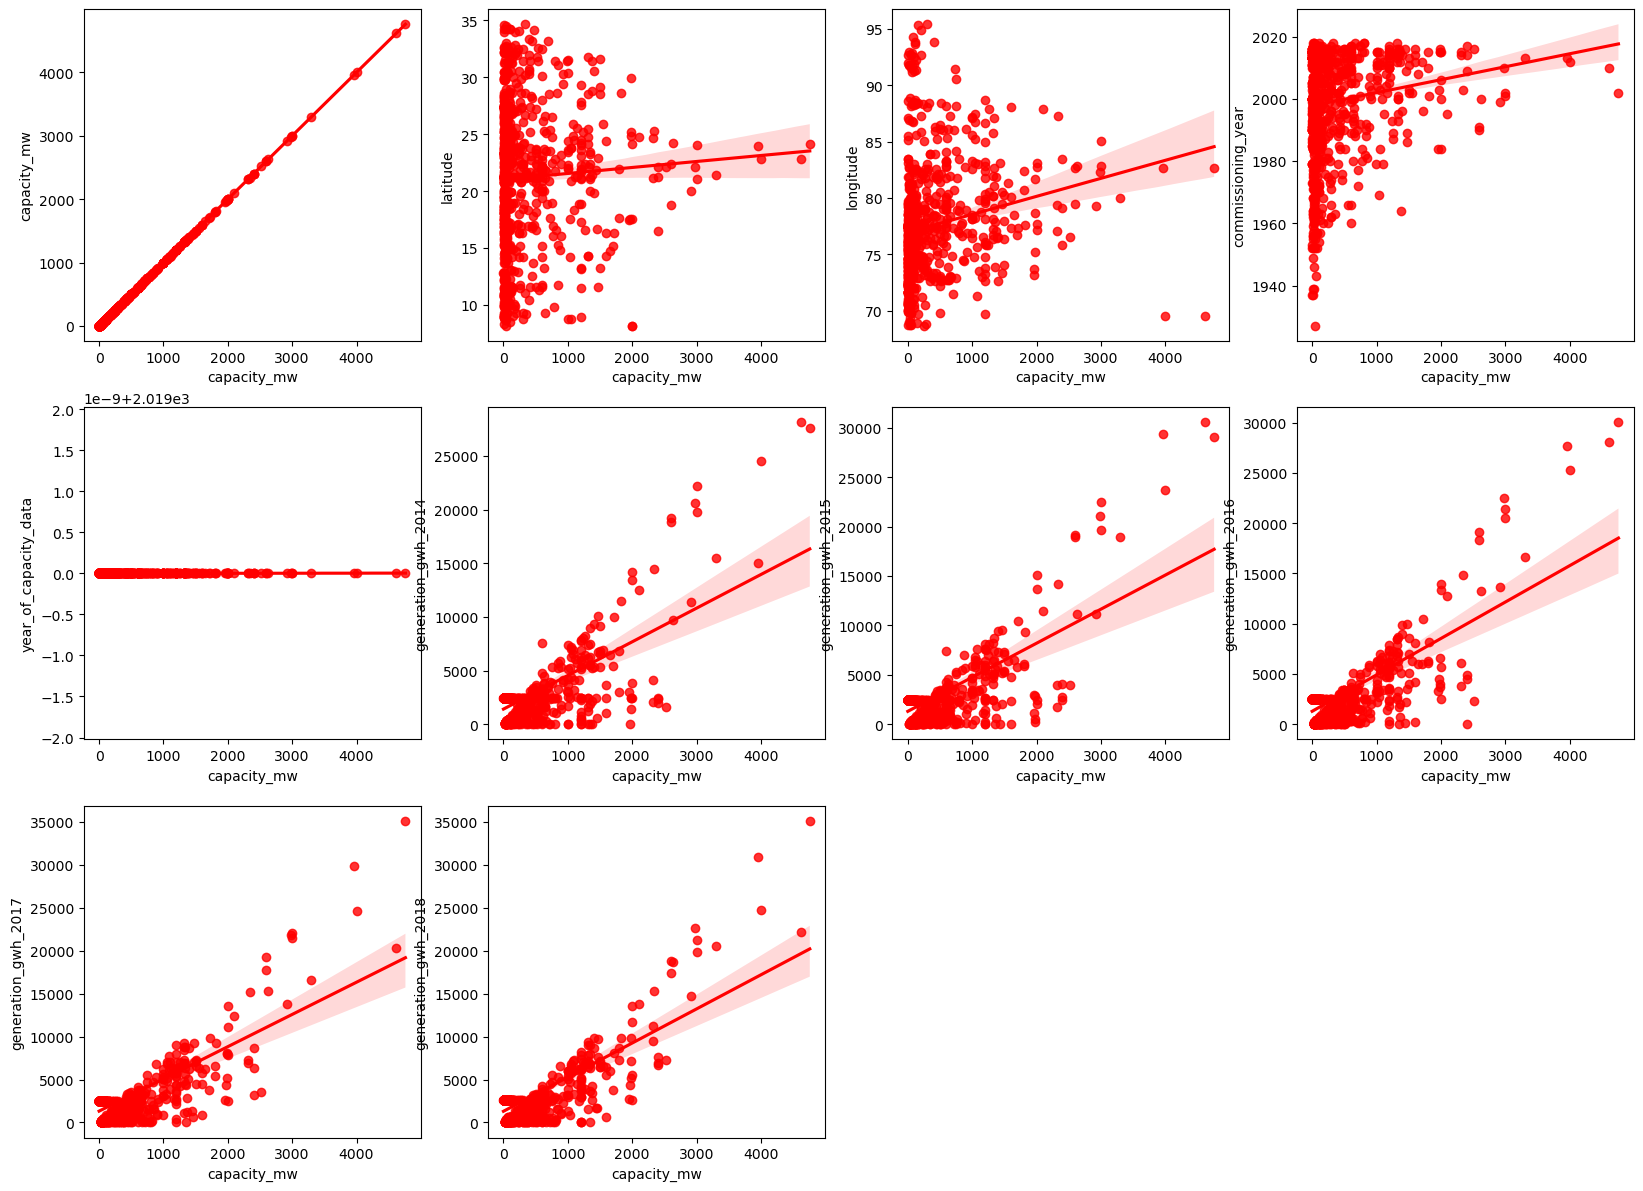

In [85]:
plt.figure(figsize=(20,25))
p=1
for col in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='capacity_mw',y=col,data=df,color='r')
        plt.xlabel('capacity_mw')
        plt.ylabel(col)
        p+=1
plt.show() 

WRI                                     765
Industry About                          119
Unknown                                  19
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


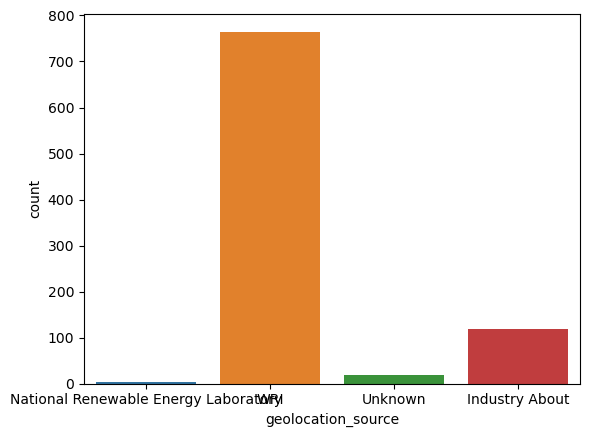

In [87]:
print(df["geolocation_source"].value_counts())
ax=sns.countplot(x="geolocation_source",data=df)
plt.show()

In [88]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df 

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,1.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2011.0,258.0,174.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2011.0,2.0,21.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,260.0,22.0,3.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,260.0,22.0,3.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.0,260.0,22.0,3.0,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2016.0,114.0,77.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2016.0,260.0,21.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2016.0,91.0,59.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    float64
 1   gppd_idnr              907 non-null    float64
 2   capacity_mw            907 non-null    float64
 3   latitude               907 non-null    float64
 4   longitude              907 non-null    float64
 5   primary_fuel           907 non-null    float64
 6   commissioning_year     907 non-null    float64
 7   owner                  907 non-null    float64
 8   source                 907 non-null    float64
 9   geolocation_source     907 non-null    float64
 10  year_of_capacity_data  907 non-null    float64
 11  generation_gwh_2014    907 non-null    float64
 12  generation_gwh_2015    907 non-null    float64
 13  generation_gwh_2016    907 non-null    float64
 14  generation_gwh_2017    907 non-null    float64
 15  genera

all the object columns converted into the float datatype

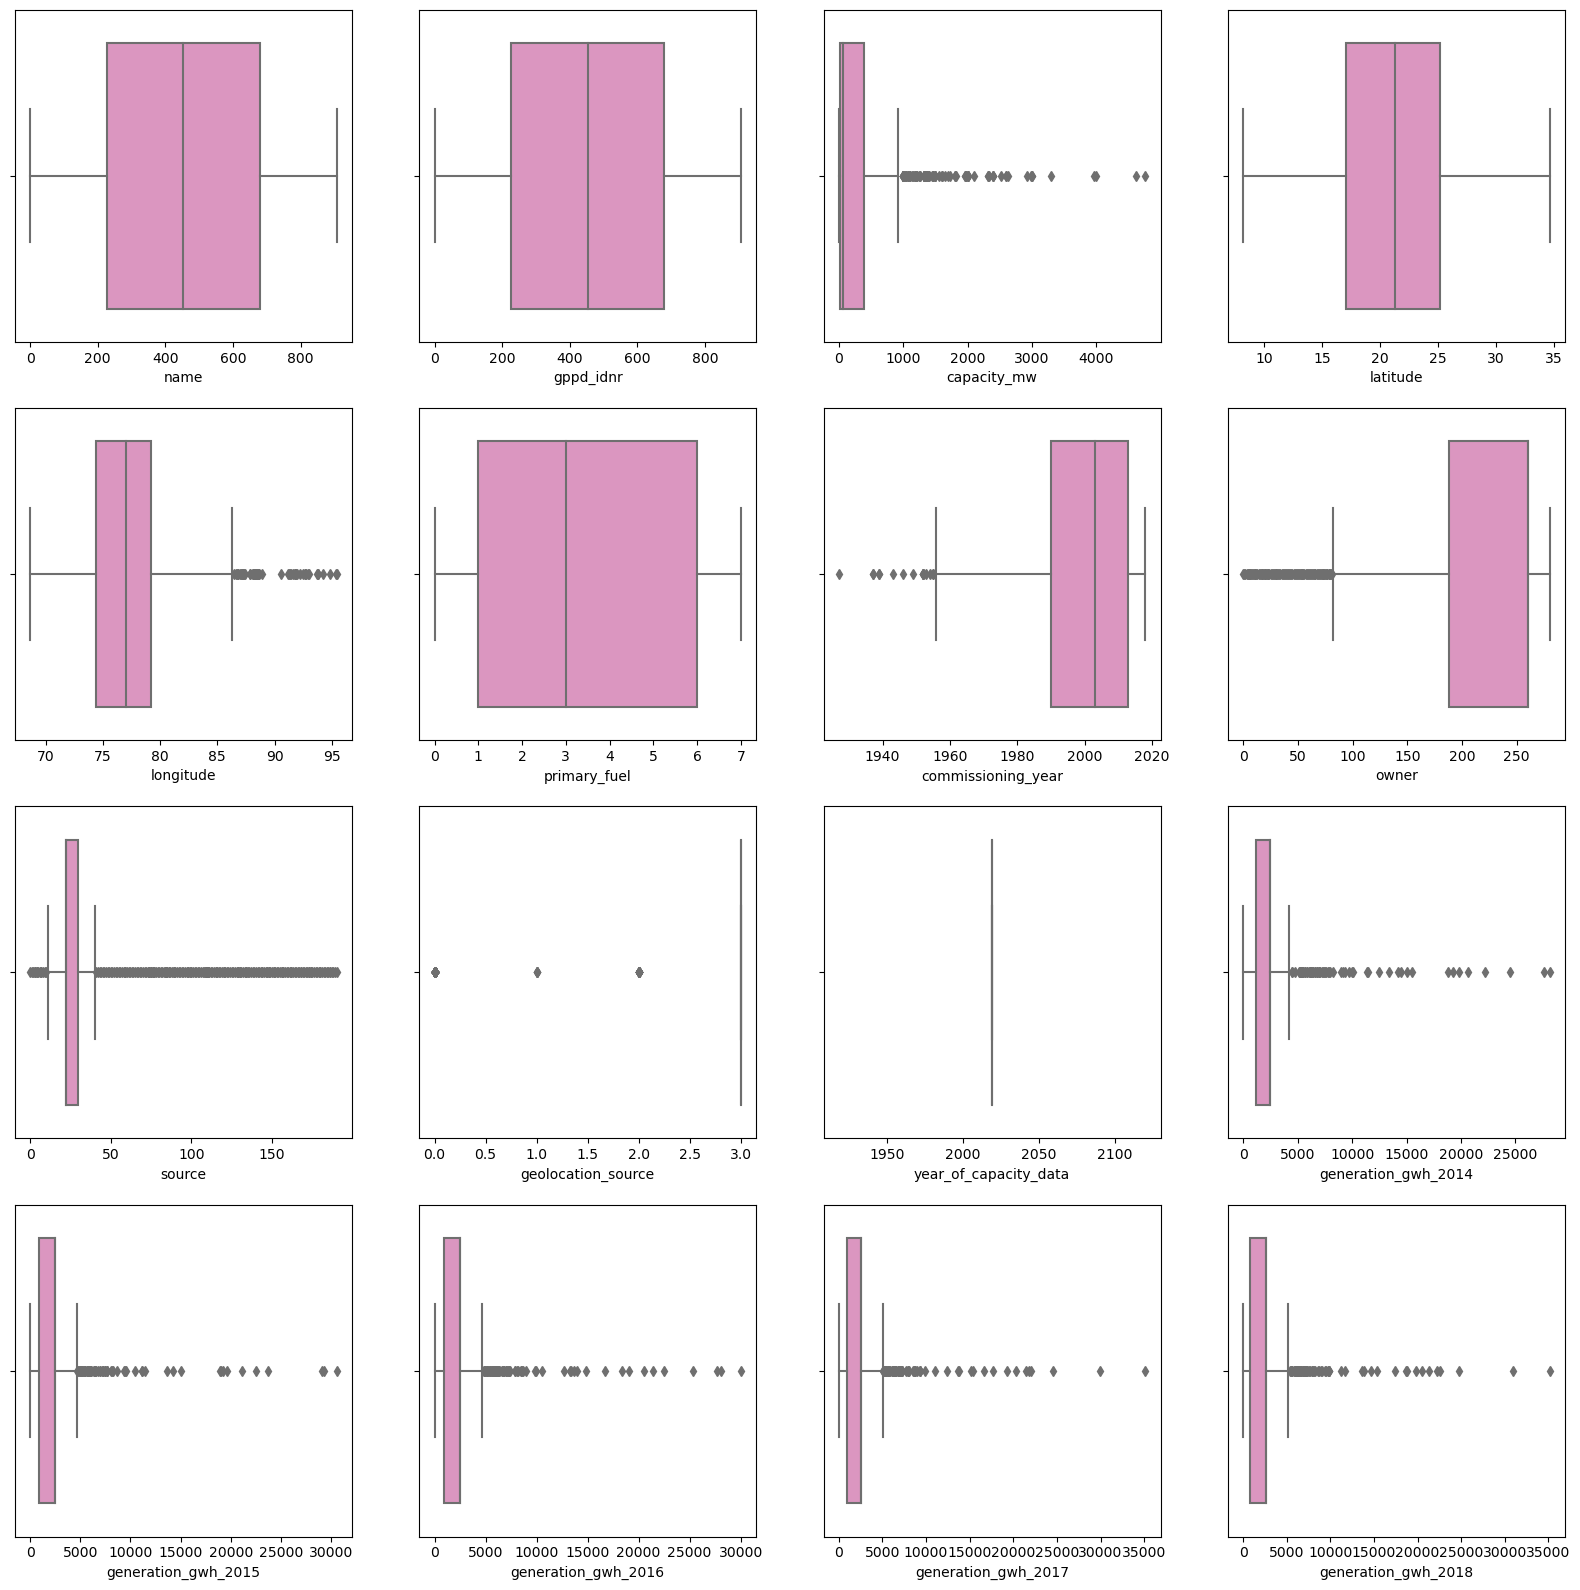

In [92]:
# lets check the outliers using box plot

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()  

Here we have outliers in all the continius data columns

In [93]:
#treating outliers

from scipy.stats import zscore
out_features=df[['longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(out_features))
z

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.878280,0.707235,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.593788,0.707235,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,1.682394,0.707235,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,2.889052,0.288916,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,1.027976,0.946275,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...
902,0.022477,1.006035,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.145644,1.006035,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.391673,1.006035,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.772866,1.006035,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16


In [94]:
# threshold = 3
np.where(z>3)

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 179, 183, 209,
        209, 209, 209, 209, 244, 308, 308, 308, 308, 308, 323, 333, 340,
        360, 364, 364, 364, 364, 364, 416, 427, 493, 493, 493, 493, 493,
        494, 494, 494, 494, 494, 499, 519, 538, 539, 546, 573, 577, 601,
        638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695, 695,
        695, 695, 695, 709, 710, 721, 721, 721, 721, 724, 724, 724, 724,
        724, 726, 726, 726, 726, 726, 728, 786, 786, 786, 786, 786, 808,
        808, 808, 808, 808, 818, 847, 880, 880, 880, 880, 880], dtype=int64),
 array([3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 0, 0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5,
        6, 0, 0, 0, 0, 2, 3, 4, 5, 6, 0, 0, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4,
        5, 6, 1, 1, 2, 3, 4, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 1, 2, 3, 4,
        5, 6, 2, 3, 4, 5, 6, 0, 0, 2, 3, 4, 5, 6], dtype=int64))

In [95]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(867, 16)

In [96]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (907, 16)
New Dataframe (867, 16)


In [97]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 4.410143329658213


In [115]:
df=df1

Here we have treated the outliers and the dataloss percentage is 4.41% which is acceptable

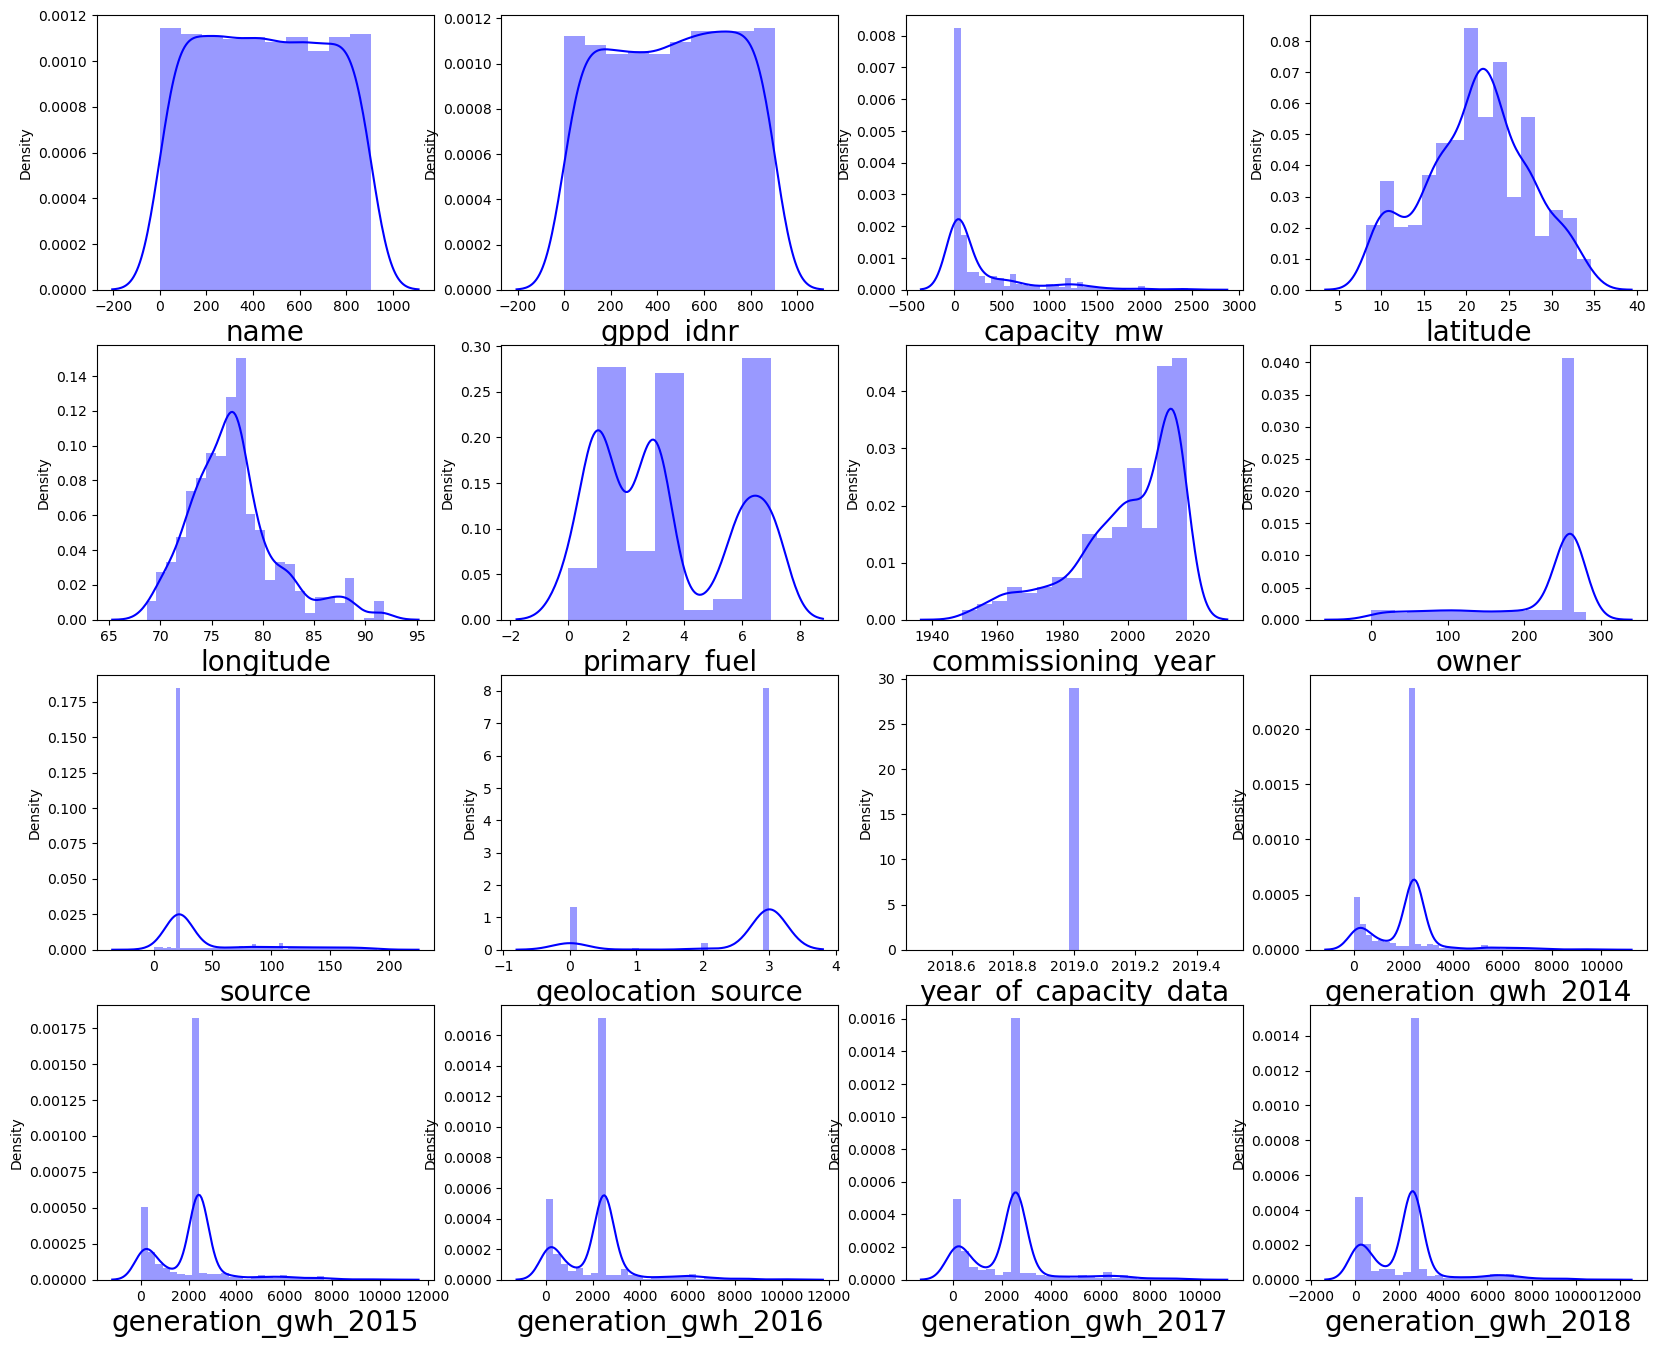

In [116]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=18:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

Here we have skewness in all the continous data columns

In [99]:
df.skew()

name                     0.000000
gppd_idnr                0.000000
capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
primary_fuel             0.472251
commissioning_year      -1.197957
owner                   -1.485398
source                   1.827373
geolocation_source      -2.078834
year_of_capacity_data    0.000000
generation_gwh_2014      5.035446
generation_gwh_2015      5.364134
generation_gwh_2016      5.068427
generation_gwh_2017      5.110952
generation_gwh_2018      4.937907
dtype: float64

In [101]:
# removing skewness using cube root

df['capacity_mw']=np.cbrt(df['capacity_mw'])
df['generation_gwh_2014']=np.cbrt(df['generation_gwh_2014'])
df['generation_gwh_2015']=np.cbrt(df['generation_gwh_2015'])
df['generation_gwh_2016']=np.cbrt(df['generation_gwh_2016'])
df['generation_gwh_2017']=np.cbrt(df['generation_gwh_2017'])
df['generation_gwh_2018']=np.cbrt(df['generation_gwh_2018'])

In [102]:
df.skew()

name                     0.000000
gppd_idnr                0.000000
capacity_mw              1.013378
latitude                -0.149698
longitude                1.141881
primary_fuel             0.472251
commissioning_year      -1.197957
owner                   -1.485398
source                   1.827373
geolocation_source      -2.078834
year_of_capacity_data    0.000000
generation_gwh_2014     -0.371187
generation_gwh_2015     -0.269579
generation_gwh_2016     -0.279323
generation_gwh_2017     -0.331857
generation_gwh_2018     -0.316915
dtype: float64

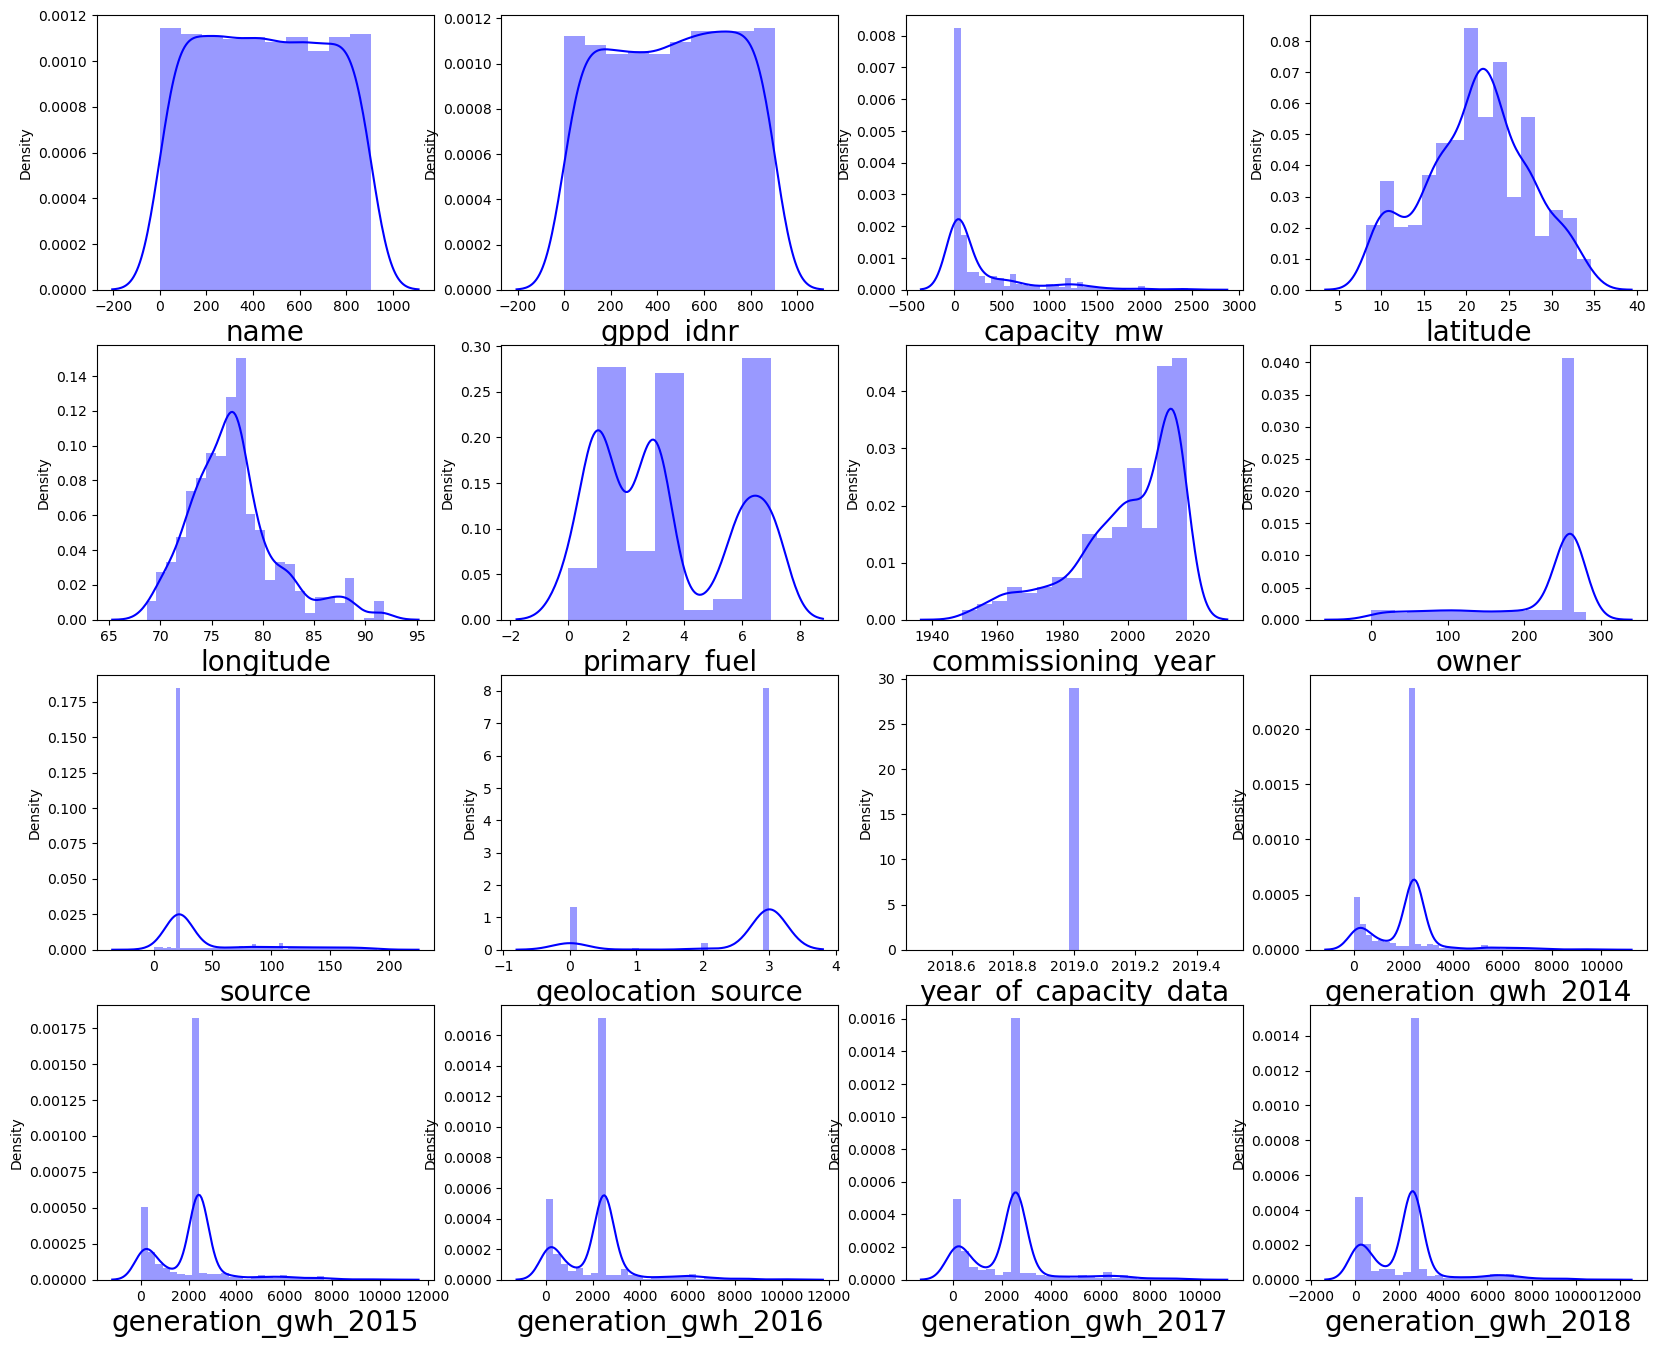

In [117]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=18:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

In [118]:
cor=df.corr()

In [119]:
cor

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.332481,0.040039,-0.134330,0.020019,0.049737,-0.014458,0.127936,-0.009025,0.024768,NaN,0.067219,0.039043,0.032662,0.048443,0.041442
gppd_idnr,0.332481,1.000000,-0.386548,-0.094830,-0.383282,0.609738,0.184405,-0.559216,0.410175,-0.487010,NaN,0.182443,0.175880,0.150502,0.136609,0.131630
capacity_mw,0.040039,-0.386548,1.000000,0.037468,0.242768,-0.400755,0.158995,0.317410,-0.269464,0.241689,NaN,0.390040,0.412092,0.486013,0.537435,0.566733
latitude,-0.134330,-0.094830,0.037468,1.000000,-0.009515,-0.001177,0.061219,-0.007846,0.064270,-0.199487,NaN,0.035438,0.019598,0.009496,0.007243,0.008894
longitude,0.020019,-0.383282,0.242768,-0.009515,1.000000,-0.376907,0.009848,0.252088,-0.239918,0.267851,NaN,-0.059586,-0.057569,-0.015166,-0.021236,-0.015671
primary_fuel,0.049737,0.609738,-0.400755,-0.001177,-0.376907,1.000000,0.039827,-0.238172,0.042401,-0.511895,NaN,-0.039325,-0.039532,-0.051221,-0.055969,-0.063941
commissioning_year,-0.014458,0.184405,0.158995,0.061219,0.009848,0.039827,1.000000,-0.104608,0.058789,-0.180651,NaN,0.138110,0.160537,0.191447,0.191774,0.193979
owner,0.127936,-0.559216,0.317410,-0.007846,0.252088,-0.238172,-0.104608,1.000000,-0.176514,0.409610,NaN,-0.107579,-0.114199,-0.109234,-0.103035,-0.100803
source,-0.009025,0.410175,-0.269464,0.064270,-0.239918,0.042401,0.058789,-0.176514,1.000000,-0.499912,NaN,0.089206,0.094696,0.090579,0.085438,0.083587
geolocation_source,0.024768,-0.487010,0.241689,-0.199487,0.267851,-0.511895,-0.180651,0.409610,-0.499912,1.000000,NaN,-0.075728,-0.080389,-0.076893,-0.072530,-0.070958


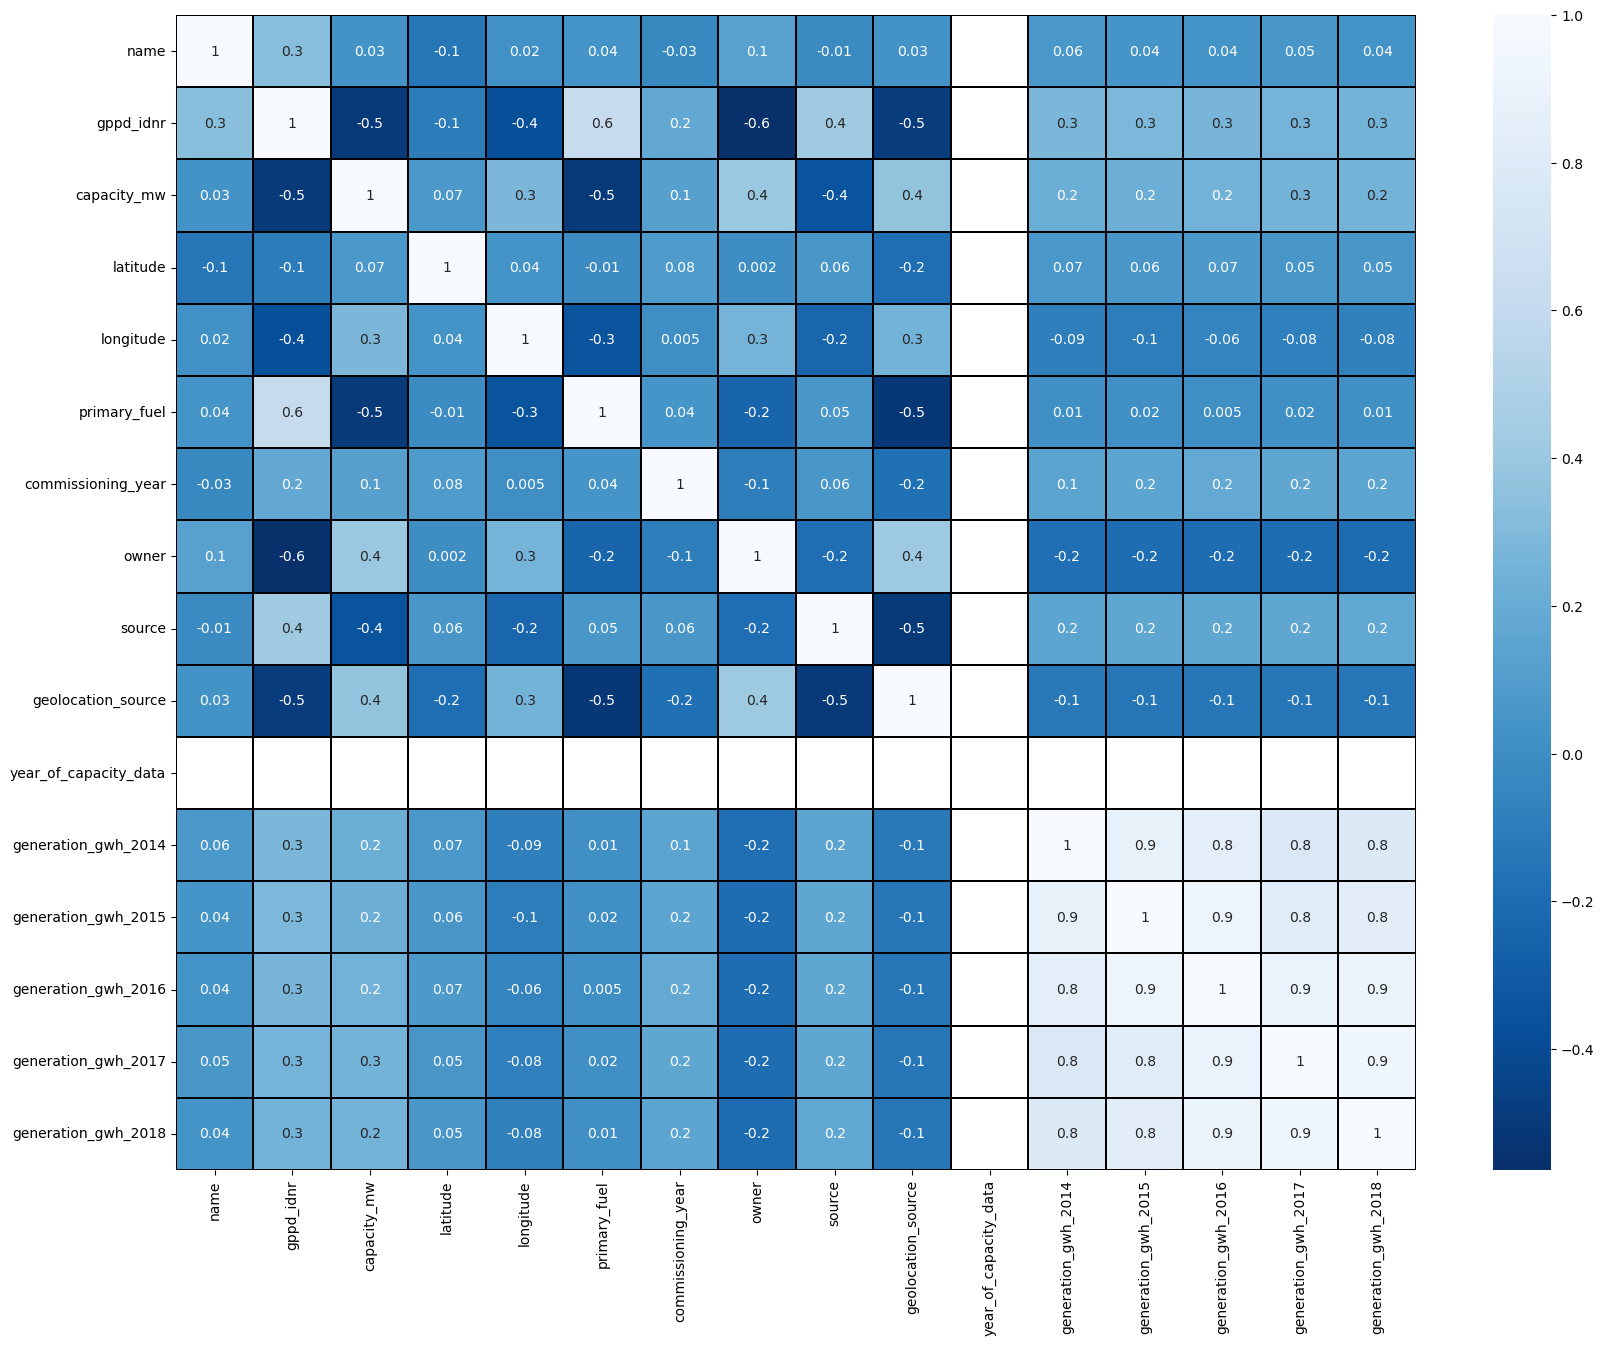

In [106]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

In [120]:
cor["capacity_mw"].sort_values(ascending=False)

capacity_mw              1.000000
generation_gwh_2018      0.566733
generation_gwh_2017      0.537435
generation_gwh_2016      0.486013
generation_gwh_2015      0.412092
generation_gwh_2014      0.390040
owner                    0.317410
longitude                0.242768
geolocation_source       0.241689
commissioning_year       0.158995
name                     0.040039
latitude                 0.037468
source                  -0.269464
gppd_idnr               -0.386548
primary_fuel            -0.400755
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

Here we have moderate positive corrleation with the target variable and moderate negative corelation

In [121]:
cor["primary_fuel"].sort_values(ascending=False)

primary_fuel             1.000000
gppd_idnr                0.609738
name                     0.049737
source                   0.042401
commissioning_year       0.039827
latitude                -0.001177
generation_gwh_2014     -0.039325
generation_gwh_2015     -0.039532
generation_gwh_2016     -0.051221
generation_gwh_2017     -0.055969
generation_gwh_2018     -0.063941
owner                   -0.238172
longitude               -0.376907
capacity_mw             -0.400755
geolocation_source      -0.511895
year_of_capacity_data         NaN
Name: primary_fuel, dtype: float64

Here we have moderate negative corrleation with the target in longitude,capacity_mw,geolocation_source

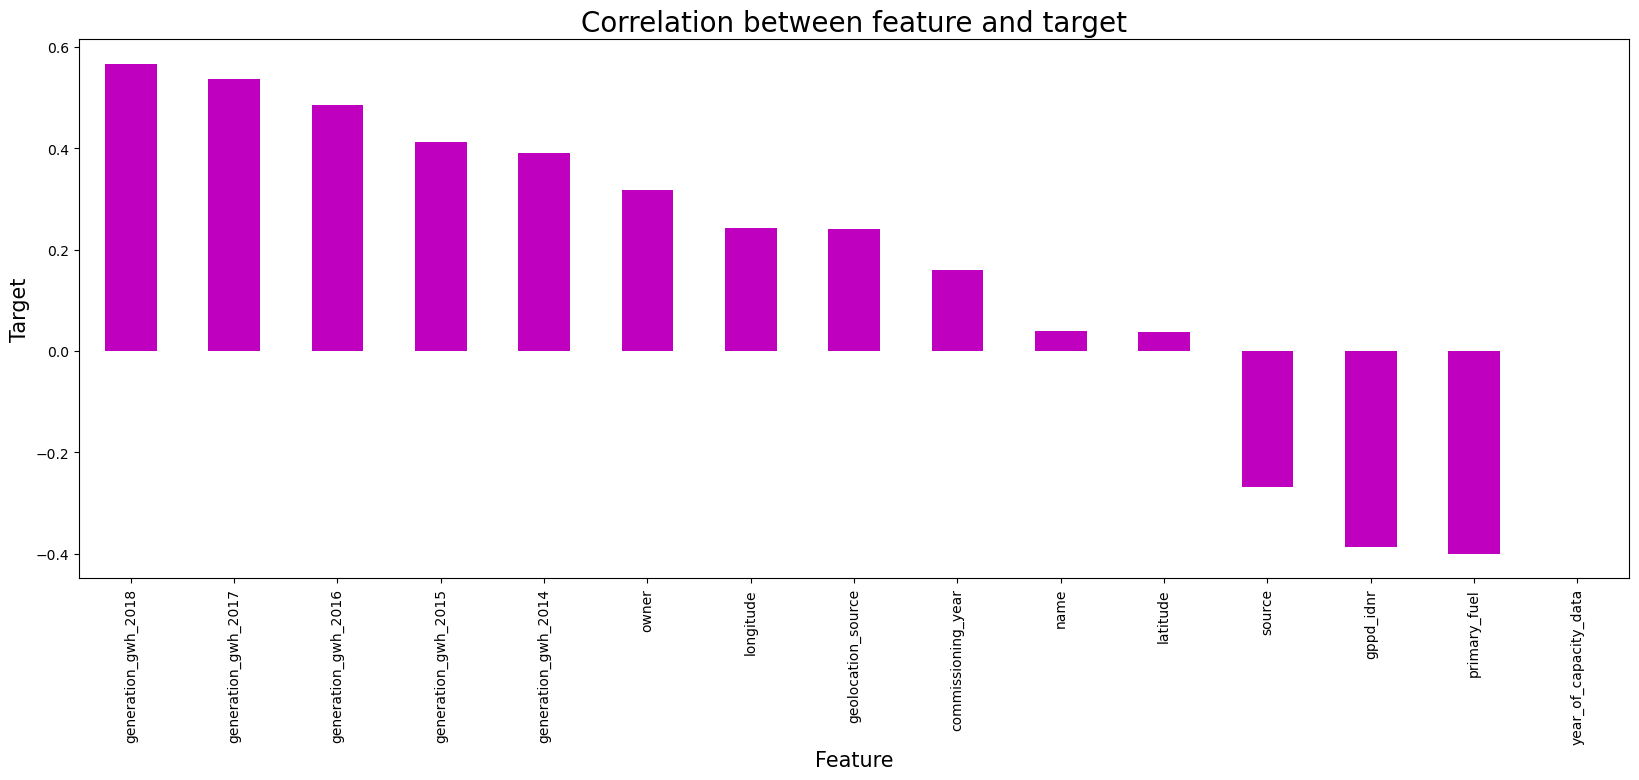

In [122]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

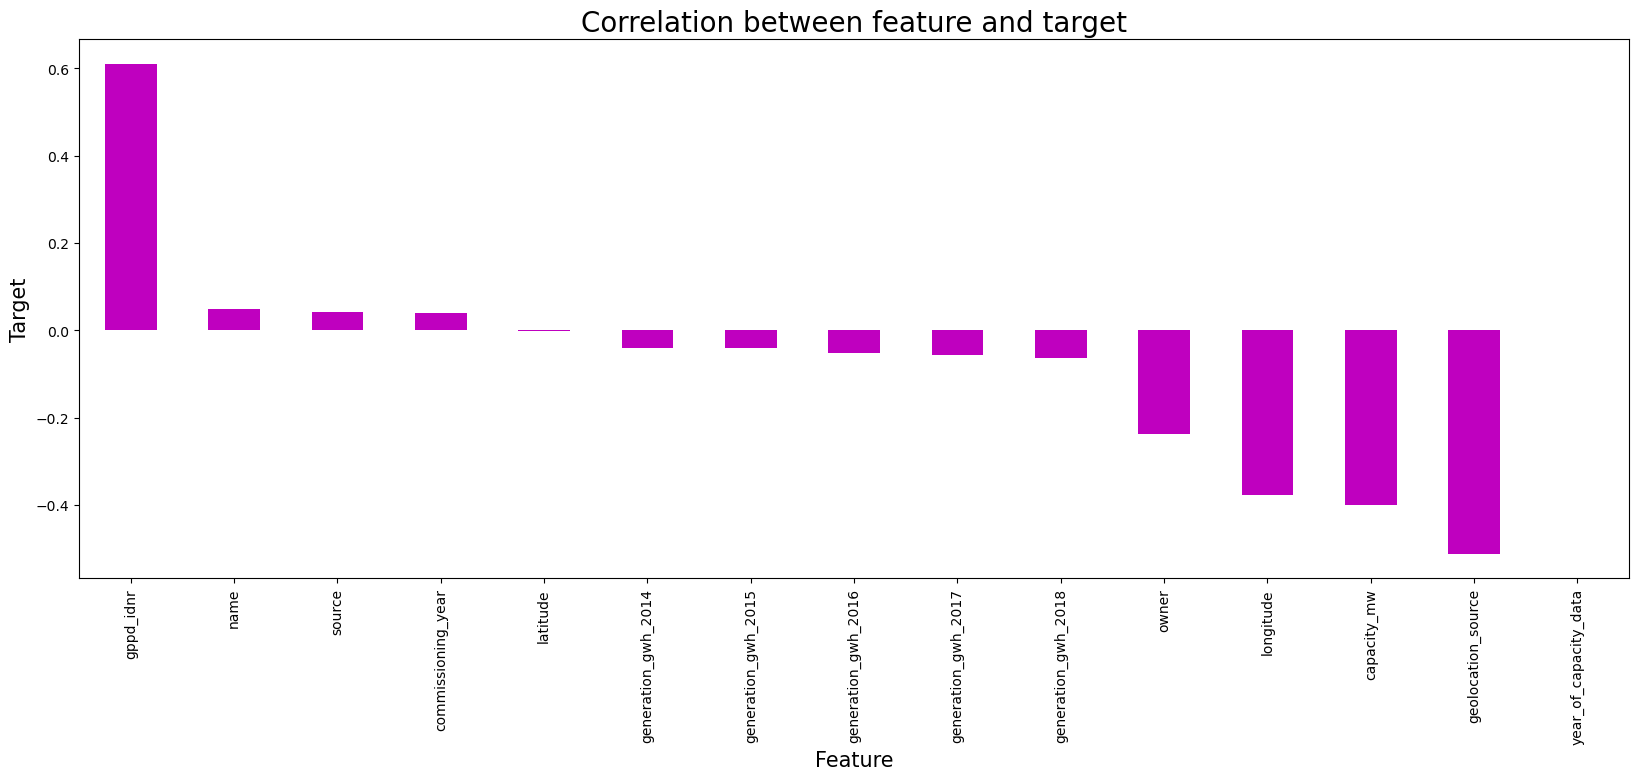

In [123]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

Here first build model on regression problem on capacity_mw

In [124]:
# separating the indepent and target variables into x and y for the regression problem 

x=df.drop('capacity_mw', axis=1)
y=df['capacity_mw']

In [125]:
x.shape

(867, 15)

In [126]:
y.shape

(867,)

In [127]:
# feature sclaing using standrd scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.710663,0.748271,1.152262,-0.896006,1.189069,0.706828,0.201409,1.421177,-1.507117,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
1,-1.706864,0.225048,0.593308,-0.579178,-0.982209,0.706828,0.576995,2.856490,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
2,-1.703065,1.491399,0.125141,-1.791522,1.623325,0.706828,-2.738522,-0.522015,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
3,-1.699266,-1.742725,0.446913,3.299547,-0.547954,0.271366,0.602897,-0.499934,0.424399,0.0,-1.041541,-0.846621,-0.810561,-0.964022,-0.963667
4,-1.695467,-1.738934,0.134382,1.226928,-0.982209,0.955663,0.602897,-0.499934,0.424399,0.0,0.584456,2.470198,2.547838,1.880417,2.846473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1.716114,0.118887,-0.792204,0.057073,-0.982209,1.017872,0.602897,-0.499934,0.424399,0.0,0.178436,-1.397668,-1.219568,-0.842562,-0.929155
863,1.719914,1.373864,-1.348558,0.244303,1.189069,1.017872,-1.287983,0.714562,-2.472875,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
864,1.723713,1.635475,-0.958879,-0.354089,1.623325,1.017872,0.602897,-0.522015,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
865,1.727512,0.300878,0.525221,-0.778611,-0.982209,1.017872,-1.585862,0.317091,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197


In [128]:
# finding variance inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns

vif

,VIF Values,Features
0,1.783649,name
1,5.859635,gppd_idnr
2,1.108547,latitude
3,1.296789,longitude
4,3.577624,primary_fuel
5,1.170661,commissioning_year
6,2.500966,owner
7,2.452496,source
8,2.625450,geolocation_source
9,NaN,year_of_capacity_data


Here generation_gwh_2017 has highest vif values but we are not dropping it as it is an neccessary column for the target variable

In [129]:
#importing necessary libaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [130]:
# finding the best random state

maxACCU=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=i
print("Maximum r2 score is:", maxACCU,  "on random state:",maxRS)  

Maximum r2 score is: 0.6847154476532333 on random state: 48


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression

In [133]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.6847154476532333
R2_score on training data: 61.477359673805985
Mean absolute error: 189.33314348682762
Mean Squared Error: 70962.98507363914
Root Mean Squared Error: 266.38878556282947


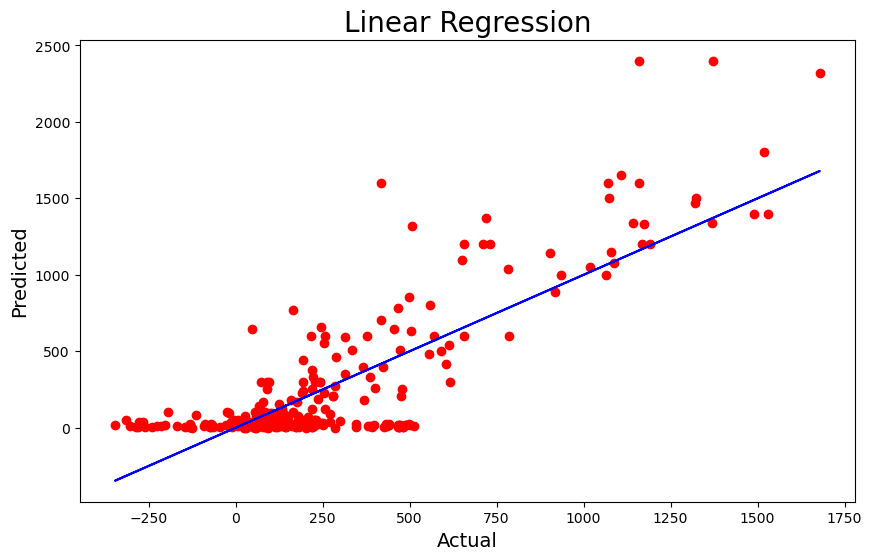

In [134]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=20)
plt.show()

In [135]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.8407107422943508
R2_score on training data: 96.53136151154521
Mean absolute error: 94.15758099616858
Mean Squared Error: 35852.1885478382
Root Mean Squared Error: 189.34674158231033


In [136]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.7689853518501204
R2_score on training data: 76.64460365526396
Mean absolute error: 126.84717318007664
Mean Squared Error: 51995.85233856138
Root Mean Squared Error: 228.02599048915758


In [137]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8224328849632127
R2_score on training data: 95.56506334816694
Mean absolute error: 101.85147114617575
Mean Squared Error: 39966.09551636327
Root Mean Squared Error: 199.91522082213567


In [138]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.6857627676540439
R2_score on training data: 61.44911232018862
Mean absolute error: 188.61434106131128
Mean Squared Error: 70727.25847989504
Root Mean Squared Error: 265.9459690987909


In [139]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.684731593528673
R2_score on training data: 61.47608386266828
Mean absolute error: 189.2028126599261
Mean Squared Error: 70959.35102462124
Root Mean Squared Error: 266.38196452579376


In [140]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.6174757564961542
R2_score on training data: 100.0
Mean absolute error: 139.29359770114942
Mean Squared Error: 86097.02562342145
Root Mean Squared Error: 266.38196452579376


In [141]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: -0.16952354249677182
R2_score on training data: -19.078656176864328
Mean absolute error: 254.21153792298605
Mean Squared Error: 263231.6777708412
Root Mean Squared Error: 513.0610858083481


In [142]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.8483235490967153
R2_score on training data: 99.99999999986619
Mean absolute error: 86.68772942528736
Mean Squared Error: 34138.728464039
Root Mean Squared Error: 184.7666865645401


In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.56897887 0.54656919 0.6001681  0.65467016 0.59170107]
0.5924174768300718
Difference betweem r score and Cv is :  9.22979708231615


In [145]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.79366476 0.75046281 0.73678131 0.77075243 0.79589808]
0.7695118767752648
Difference betweem r score and Cv is :  7.119886551908605


In [146]:
score2=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.7063734  0.67976261 0.64551828 0.7030071  0.70450059]
0.6878323946493006
Difference betweem r score and Cv is :  8.115295720081983


In [147]:
score3=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.77712857 0.6846866  0.72029092 0.68690324 0.70724887]
0.7152516368908479
Difference betweem r score and Cv is :  10.718124807236473


In [148]:
score4=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_lasso)-score4.mean())*100)

[0.58163897 0.55068951 0.59933811 0.65548773 0.59187164]
0.5958051915390963
Difference betweem r score and Cv is :  8.99575761149476


In [149]:
score5=cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.57097656 0.54782645 0.59977486 0.655481   0.5911876 ]
0.5930492933211242
Difference betweem r score and Cv is :  9.168230020754875


In [150]:
score6=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.55081975 0.61018453 0.69177128 0.67063269 0.71804273]
0.6482901958866039
Difference betweem r score and Cv is :  -3.08144393904497


In [151]:
score7=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_svr)-score7.mean())*100)

[-0.17793589 -0.16570818 -0.19894661 -0.23645103 -0.17838378]
-0.19148509729620322
Difference betweem r score and Cv is :  2.1961554799431404


In [152]:
score8=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.83887012 0.80869041 0.73421961 0.7848323  0.7772984 ]
0.7887821659585323
Difference betweem r score and Cv is :  5.954138313818291


Here Extra Tree Classifier is our best fit model as cv score and r2 score is least

In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'max_depth': [2,8,16,32,50],  
    'bootstrap': [True, False]
}

gscv=GridSearchCV(etr,param_grid,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [2, 8, 16, 32, 50]})

In [158]:
gscv.best_params_

{'bootstrap': False, 'criterion': 'mse', 'max_depth': 16}

In [159]:
Model=ExtraTreesRegressor(bootstrap=False,criterion='mse',max_depth=16)

In [160]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred_rd))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.684731593528673
Mean absolute error: 88.07743598559375
Mean Squared Error: 34366.960010891984
Root Mean Squared Error: 185.3832786712221


In [161]:
import joblib

In [163]:
import pickle
filename='Global Power Plant.pkl'
pickle.dump(Model,open(filename,'wb'))  #saved model

In [164]:
import pickle
loaded_model=pickle.load(open('Global Power Plant.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.73095291677863


In [165]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
Predicted,29.519883,400.812982,280.104799,12.850139,225.718043,10.258731,56.316518,600.879229,1136.96,397.818639,...,53.045243,50.1472,1514.7708,102.580762,28.948999,469.781957,36.147587,450.676796,910.3678,40.498522
Original,22.500000,225.000000,250.000000,4.800000,186.000000,15.000000,50.400000,780.000000,1050.00,210.000000,...,75.000000,36.8000,1400.0000,120.000000,12.000000,300.000000,20.000000,400.000000,600.0000,30.000000


Now working with Classification Problem on primary_fuel

In [166]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.0,229.0,109.0,1.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2011.0,258.0,174.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2011.0,2.0,21.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.0,260.0,22.0,3.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.0,260.0,22.0,3.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.0,260.0,22.0,3.0,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2016.0,114.0,77.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2016.0,260.0,21.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2016.0,91.0,59.0,3.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [168]:
X=df.drop("primary_fuel",axis=1)
Y=df["primary_fuel"]

In [169]:
X.shape

(867, 15)

In [170]:
Y.shape

(867,)

In [171]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.710663,0.748271,-0.610037,1.152262,-0.896006,0.706828,0.201409,1.421177,-1.507117,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
1,-1.706864,0.225048,-0.400336,0.593308,-0.579178,0.706828,0.576995,2.856490,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
2,-1.703065,1.491399,-0.529450,0.125141,-1.791522,0.706828,-2.738522,-0.522015,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
3,-1.699266,-1.742725,-0.319090,0.446913,3.299547,0.271366,0.602897,-0.499934,0.424399,0.0,-1.041541,-0.846621,-0.810561,-0.964022,-0.963667
4,-1.695467,-1.738934,3.336954,0.134382,1.226928,0.955663,0.602897,-0.499934,0.424399,0.0,0.584456,2.470198,2.547838,1.880417,2.846473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1.716114,0.118887,2.897789,-0.792204,0.057073,1.017872,0.602897,-0.499934,0.424399,0.0,0.178436,-1.397668,-1.219568,-0.842562,-0.929155
863,1.719914,1.373864,-0.608939,-1.348558,0.244303,1.017872,-1.287983,0.714562,-2.472875,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
864,1.723713,1.635475,-0.559533,-0.958879,-0.354089,1.017872,0.602897,-0.522015,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197
865,1.727512,0.300878,-0.439861,0.525221,-0.778611,1.017872,-1.585862,0.317091,0.424399,0.0,0.178436,0.189418,0.181181,0.170899,0.167197


In [172]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF Values,Features
0,1.517471,name
1,3.283658,gppd_idnr
2,2.587330,capacity_mw
3,1.108598,latitude
4,1.242548,longitude
5,1.159710,commissioning_year
6,1.888285,owner
7,1.544980,source
8,1.761871,geolocation_source
9,NaN,year_of_capacity_data


In [173]:
Y.value_counts()

1.0    240
3.0    235
6.0    126
7.0    123
2.0     65
0.0     49
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [174]:
#finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxACCU=0
maxRS=0

for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(X_train,Y_train)
    pred=RFC.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=1
print("best accuracy is:", maxACCU,  "at random state:",maxRS)        
        

best accuracy is: 0.9080459770114943 at random state: 1


In [176]:
# creating train test split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=maxRS)

In [177]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [178]:
#checking accuracy score for randomforestclassifier

RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
predRFC=RFC.predict(X_test)
print(accuracy_score(Y_test,predRFC))
print(confusion_matrix(Y_test,predRFC))
print(classification_report(Y_test,predRFC))

0.8390804597701149
[[16  5  0  0  0  0  0  0]
 [ 3 64  1  5  0  0  0  0]
 [ 0  3  1  9  0  0  0  0]
 [ 0  4  2 60  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 1  2  4  0  0  0  0  0]
 [ 0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78        21
         1.0       0.79      0.88      0.83        73
         2.0       0.12      0.08      0.10        13
         3.0       0.81      0.91      0.86        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         7
         6.0       1.00      1.00      1.00        47
         7.0       1.00      1.00      1.00        31

    accuracy                           0.84       261
   macro avg       0.57      0.58      0.57       261
weighted avg       0.80      0.84      0.82       261



In [179]:
#checking accuracy score for Logistic Regression

LR=LogisticRegression()
LR.fit(X_train,Y_train)
predLR=LR.predict(X_test)
print(accuracy_score(Y_test,predLR))
print(confusion_matrix(Y_test,predLR))
print(classification_report(Y_test,predLR))

0.7624521072796935
[[12  9  0  0  0  0  0  0]
 [ 4 52  3 14  0  0  0  0]
 [ 1  4  0  8  0  0  0  0]
 [ 0  6  3 57  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 2  2  1  2  0  0  0  0]
 [ 0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

         0.0       0.63      0.57      0.60        21
         1.0       0.69      0.71      0.70        73
         2.0       0.00      0.00      0.00        13
         3.0       0.70      0.86      0.77        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         7
         6.0       1.00      1.00      1.00        47
         7.0       1.00      1.00      1.00        31

    accuracy                           0.76       261
   macro avg       0.50      0.52      0.51       261
weighted avg       0.72      0.76      0.74       261



In [180]:
#checking accuracy score for support vector machine

svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.7816091954022989
[[12  9  0  0  0  0  0  0]
 [ 3 55  1 14  0  0  0  0]
 [ 1  2  0 10  0  0  0  0]
 [ 0  6  0 60  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 2  1  0  3  0  0  0  1]
 [ 1  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

         0.0       0.63      0.57      0.60        21
         1.0       0.73      0.75      0.74        73
         2.0       0.00      0.00      0.00        13
         3.0       0.68      0.91      0.78        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         7
         6.0       1.00      0.98      0.99        47
         7.0       0.97      1.00      0.98        31

    accuracy                           0.78       261
   macro avg       0.50      0.53      0.51       261
weighted avg       0.72      0.78      0.75       261



In [181]:
#checking accuracy score for GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB.fit(X_train,Y_train)
predGB=GB.predict(X_test)
print(accuracy_score(Y_test,predGB))
print(confusion_matrix(Y_test,predGB))
print(classification_report(Y_test,predGB))

0.8237547892720306
[[14  6  1  0  0  0  0  0]
 [ 1 63  4  5  0  0  0  0]
 [ 0  2  3  6  0  2  0  0]
 [ 0  8  0 56  2  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  3  0  1  1  0  0]
 [ 0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78        21
         1.0       0.75      0.86      0.80        73
         2.0       0.27      0.23      0.25        13
         3.0       0.84      0.85      0.84        66
         4.0       0.00      0.00      0.00         3
         5.0       0.33      0.14      0.20         7
         6.0       1.00      1.00      1.00        47
         7.0       1.00      1.00      1.00        31

    accuracy                           0.82       261
   macro avg       0.64      0.59      0.61       261
weighted avg       0.82      0.82      0.82       261



In [182]:
#checking accuracy score for AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(X_train,Y_train)
predAB=AB.predict(X_test)
print(accuracy_score(Y_test,predAB))
print(confusion_matrix(Y_test,predAB))
print(classification_report(Y_test,predAB))

0.4942528735632184
[[ 0 19  0  2  0  0  0  0]
 [ 0 16  0 57  0  0  0  0]
 [ 0  1  0 12  0  0  0  0]
 [ 0  0  0 66  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  3  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 43  4]
 [ 0  0  0  0 27  0  0  4]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.41      0.22      0.29        73
         2.0       0.00      0.00      0.00        13
         3.0       0.46      1.00      0.63        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         7
         6.0       1.00      0.91      0.96        47
         7.0       0.50      0.13      0.21        31

    accuracy                           0.49       261
   macro avg       0.30      0.28      0.26       261
weighted avg       0.47      0.49      0.44       261



In [183]:
#checking accuracy score for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(X_train,Y_train)
predET=ET.predict(X_test)
print(accuracy_score(Y_test,predET))
print(confusion_matrix(Y_test,predET))
print(classification_report(Y_test,predET))

0.8275862068965517
[[17  4  0  0  0  0  0  0]
 [ 9 58  1  5  0  0  0  0]
 [ 0  2  2  9  0  0  0  0]
 [ 0  4  1 61  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  4  1  0  0  0  0]
 [ 0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72        21
         1.0       0.79      0.79      0.79        73
         2.0       0.25      0.15      0.19        13
         3.0       0.80      0.92      0.86        66
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         7
         6.0       1.00      1.00      1.00        47
         7.0       1.00      1.00      1.00        31

    accuracy                           0.83       261
   macro avg       0.56      0.59      0.57       261
weighted avg       0.79      0.83      0.81       261



In [184]:
from sklearn.model_selection import cross_val_score

In [185]:
# checking cv score for RandomForestClassifier

score1 = cross_val_score(RFC,X,Y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predRFC) - score1.mean())*100)

[0.85632184 0.85632184 0.87283237 0.84393064 0.85549133]
0.856979602684207
Difference between accuracy score and cross val score is - -1.7899142914092114


In [186]:
# checking cv score for Logistic Regression

score2 = cross_val_score(LR,X,Y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predLR) - score2.mean())*100)

[0.77586207 0.79310345 0.80346821 0.78034682 0.76878613]
0.7843133346621488
Difference between accuracy score and cross val score is - -2.186122738245533


In [187]:
# checking cv score for GradientBoostingClassifier

score3 = cross_val_score(GB,X,Y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predGB) - score3.mean())*100)

[0.79885057 0.89655172 0.89595376 0.8150289  0.84971098]
0.8512191880938144
Difference between accuracy score and cross val score is - -2.7464398821783753


In [188]:
# checking cv score for support vector machine classifier

score4 = cross_val_score(svc,X,Y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predsvc) - score4.mean())*100)

[0.77011494 0.79885057 0.79768786 0.79768786 0.78034682]
0.7889376121187961
Difference between accuracy score and cross val score is - -0.7328416716497199


In [189]:
# checking cv score for AdaBoost classifier

score5 = cross_val_score(AB,X,Y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predAB) - score5.mean())*100)

[0.39655172 0.51149425 0.65895954 0.54913295 0.58959538]
0.541146767656634
Difference between accuracy score and cross val score is - -4.689389409341565


In [190]:
# checking cv score for Extratreesclassifier

score6 = cross_val_score(ET,X,Y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is -", (accuracy_score(Y_test,predET) - score6.mean())*100)

[0.82758621 0.85057471 0.87861272 0.82080925 0.86705202]
0.8489269815959073
Difference between accuracy score and cross val score is - -2.134077469935558


Here our best fit model is rando forest classifier as it has maximum accuracy number in CV as well as in model

Hyperparameter tuning for random forest classifier

In [191]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
GCV=GridSearchCV(ExtraTreesClassifier(),param_grid,cv=5)
GCV.fit(X_train,Y_train)
GCV.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [192]:
final_model=RandomForestClassifier(n_estimators=200 ,max_depth=None ,min_samples_split=2 ,min_samples_leaf=1 ,max_features='sqrt')
final_model.fit(X_train,Y_train)
pred=final_model.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

84.2911877394636


In [193]:
# saving model using .pkl

import joblib
joblib.dump(final_model,'Global Power plant 1.pkl')

['Global Power plant 1.pkl']

In [194]:
#lets load the saved model and get the predictions

model=joblib.load('Global Power plant 1.pkl')

#prediction
prediction=model.predict(X_test)
prediction

array([1., 1., 6., 3., 1., 7., 6., 1., 3., 1., 3., 3., 1., 7., 6., 3., 1.,
       3., 7., 1., 1., 1., 1., 0., 3., 3., 1., 3., 7., 6., 3., 0., 6., 6.,
       6., 1., 0., 3., 0., 3., 6., 7., 7., 1., 3., 6., 3., 7., 1., 3., 1.,
       1., 7., 7., 2., 7., 1., 6., 3., 1., 2., 6., 0., 3., 3., 3., 1., 1.,
       3., 1., 1., 1., 1., 7., 3., 7., 3., 6., 3., 1., 3., 2., 1., 6., 3.,
       0., 3., 6., 3., 3., 0., 3., 3., 3., 1., 3., 7., 1., 1., 6., 3., 3.,
       6., 3., 3., 6., 0., 3., 1., 3., 3., 3., 7., 3., 6., 1., 1., 7., 6.,
       1., 6., 1., 3., 3., 6., 6., 6., 6., 6., 3., 1., 7., 7., 1., 0., 3.,
       0., 1., 1., 2., 3., 1., 1., 7., 1., 1., 1., 1., 0., 2., 6., 0., 3.,
       1., 6., 1., 2., 0., 1., 7., 3., 1., 3., 6., 3., 1., 1., 1., 7., 0.,
       1., 3., 2., 7., 1., 3., 6., 7., 6., 1., 3., 6., 3., 1., 1., 3., 3.,
       2., 0., 6., 3., 1., 6., 1., 1., 6., 0., 1., 6., 7., 7., 6., 1., 6.,
       1., 7., 1., 6., 3., 3., 6., 1., 3., 7., 3., 1., 6., 1., 3., 1., 1.,
       7., 7., 3., 1., 6.

In [195]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,6.0,6.0
3,3.0,3.0
4,1.0,1.0
...,...,...
256,1.0,1.0
257,3.0,3.0
258,1.0,2.0
259,3.0,1.0
